In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#Reading in all data of use
train_data = pd.read_csv('peter_data/train.csv')

In [3]:
train_data.sort_values(by='GrLivArea',ascending=False)[:2]

train_data = train_data.drop(train_data[train_data['Id']==1299].index)
train_data = train_data.drop(train_data[train_data['Id']==524].index)

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


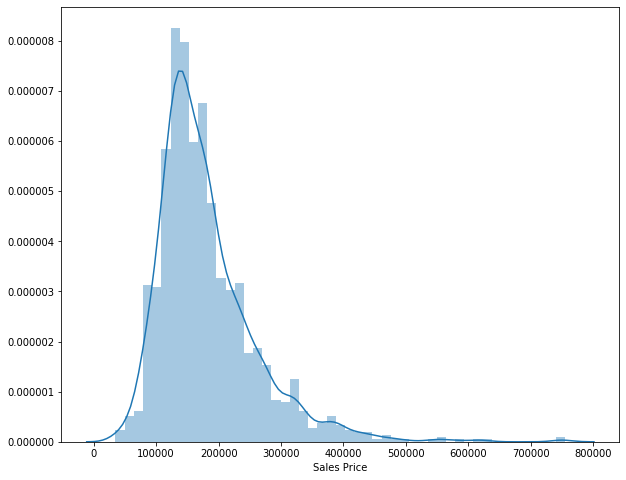

In [4]:
print(train_data['SalePrice'].describe())

#Graphed test sales prices to check and see if there is a normal distribution. The distribution seems to be skewed to the left
# and will need to be either normalized or standardized
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
sns.distplot(train_data['SalePrice'], ax=ax1).set(xlabel='Sales Price');

In [5]:
# pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)

# normalized = pt.fit_transform(train_data['SalePrice'].values.reshape(-1, 1))


In [6]:
#Graphed test sales prices to check and see if there is a normal distribution. The distribution seems to be skewed to the left
# and will need to be either normalized or standardized
# fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
# sns.distplot(normalized, ax=ax1).set(xlabel='Sales Price');

In [7]:
# normal_price = pd.DataFrame(normalized, columns = ["normalized_price"])


In [8]:
# normal_price.head(3)

In [9]:
train_data.shape

(1458, 81)

In [10]:
# train_data["normalized_price"] = normal_price

In [11]:
train_data.shape

(1458, 81)

In [12]:
# train_data = train_data.drop(["SalePrice"], axis=1)

In [13]:
print(train_data.isnull().sum().sort_values(ascending=False).head(20))

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64


In [14]:
train_data.loc[:, "MasVnrArea"] = train_data.loc[:, "MasVnrArea"].fillna(train_data["MasVnrArea"].mean())
train_data.loc[:, "MasVnrType"] = train_data.loc[:, "MasVnrType"].fillna(0)
train_data.loc[:, "BsmtFinType1"] = train_data.loc[:, "BsmtFinType1"].fillna(0)
train_data.loc[:, "BsmtQual"] = train_data.loc[:, "BsmtQual"].fillna(0)
train_data.loc[:, "BsmtCond"] = train_data.loc[:, "BsmtCond"].fillna(0)
train_data.loc[:, "BsmtExposure"] = train_data.loc[:, "BsmtExposure"].fillna(0)
train_data.loc[:, "BsmtFinType2"] = train_data.loc[:, "BsmtFinType2"].fillna(0)
train_data.loc[:, "GarageQual"] = train_data.loc[:, "GarageQual"].fillna(0)
train_data.loc[:, "GarageCond"] = train_data.loc[:, "GarageCond"].fillna("0")
train_data.loc[:, "GarageFinish"] = train_data.loc[:, "GarageFinish"].fillna(0)
train_data.loc[:, "GarageType"] = train_data.loc[:, "GarageFinish"].fillna(0)

train_data.loc[:, "GarageYrBlt"] = train_data.loc[:, "GarageYrBlt"].fillna(train_data["GarageYrBlt"].median())

train_data.loc[:, "LotFrontage"] = train_data.loc[:, "LotFrontage"].fillna(train_data["LotFrontage"].mean())

train_data.loc[:, "FireplaceQu"] = train_data.loc[:, "FireplaceQu"].fillna(0)
train_data.loc[:, "Fence"] = train_data.loc[:, "Fence"].fillna(0)
train_data.loc[:, "Alley"] = train_data.loc[:, "Alley"].fillna(0)
train_data.loc[:, "MiscFeature"] = train_data.loc[:, "MiscFeature"].fillna(0)
train_data.loc[:, "Electrical"] = train_data.loc[:, "Electrical"].fillna("SBrkr")
train_data.loc[:, "PoolQC"] = train_data.loc[:, "PoolQC"].fillna(0)

In [15]:
print(train_data.isnull().sum().sort_values(ascending=False).head())

SalePrice      0
Heating        0
RoofStyle      0
RoofMatl       0
Exterior1st    0
dtype: int64


In [16]:
train_data.shape

(1458, 81)

In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_train_df = train_data.select_dtypes(include=numerics)

In [18]:
numeric_train_df = numeric_train_df.drop(["Id"], axis=1)

In [19]:
# numeric_train_df.corr()['normalized_price'].sort_values(ascending=False)[1:10]

In [20]:
numeric_train_df.corr()['SalePrice'].sort_values(ascending=False)[1:10]

OverallQual     0.795774
GrLivArea       0.734968
TotalBsmtSF     0.651153
GarageCars      0.641047
1stFlrSF        0.631530
GarageArea      0.629217
FullBath        0.562165
TotRmsAbvGrd    0.537769
YearBuilt       0.523608
Name: SalePrice, dtype: float64

In [21]:
numeric_train_df.shape

(1458, 37)

In [22]:
# numeric_train_df = numeric_train_df.dropna(subset = ["normalized_price"])

In [23]:
# X = numeric_train_df.drop(["normalized_price"], axis =1)
# y = numeric_train_df["normalized_price"]
# y = pd.DataFrame(y)

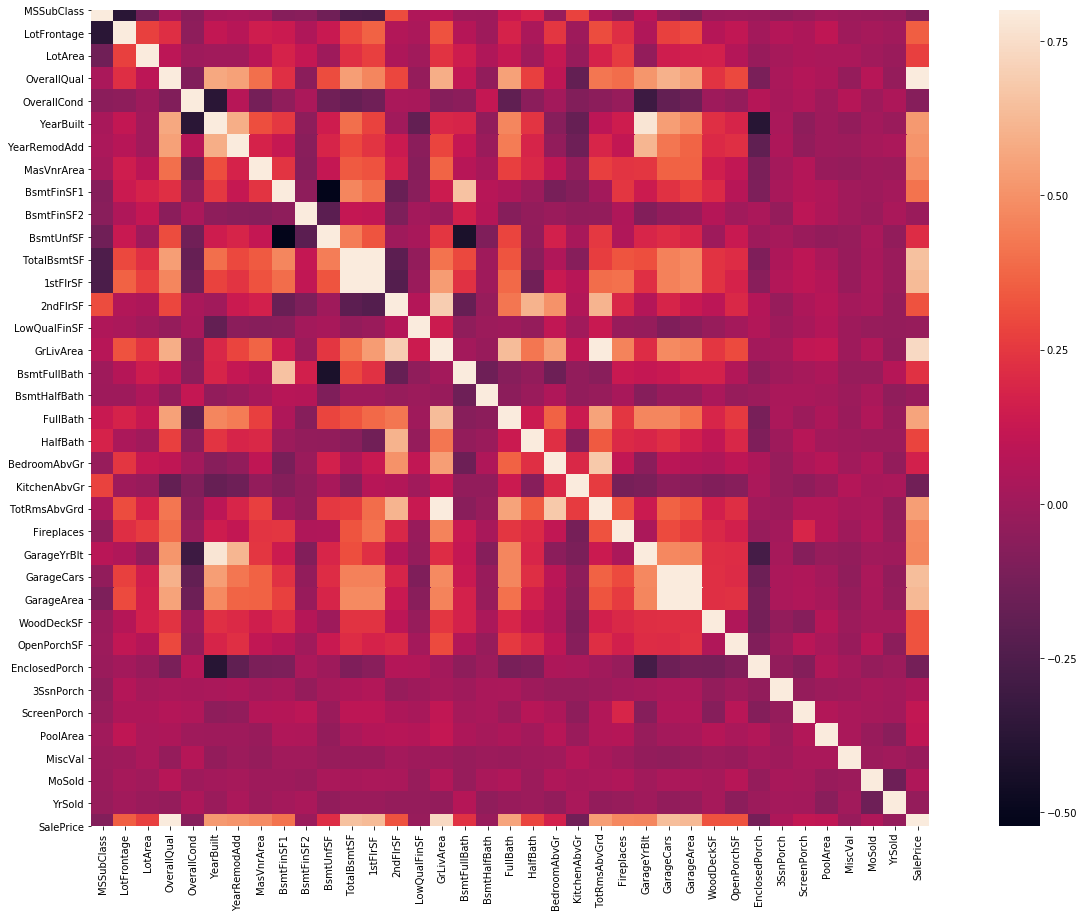

In [24]:
corrmat = numeric_train_df.corr()
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corrmat, vmax=.8, square=True);

In [25]:
numeric_train_df.shape

(1458, 37)

In [26]:
from scipy import stats
numeric_train_df = numeric_train_df[(np.abs(stats.zscore(numeric_train_df)) < 3).all(axis=1)]

In [27]:
numeric_train_df.shape

(1011, 37)

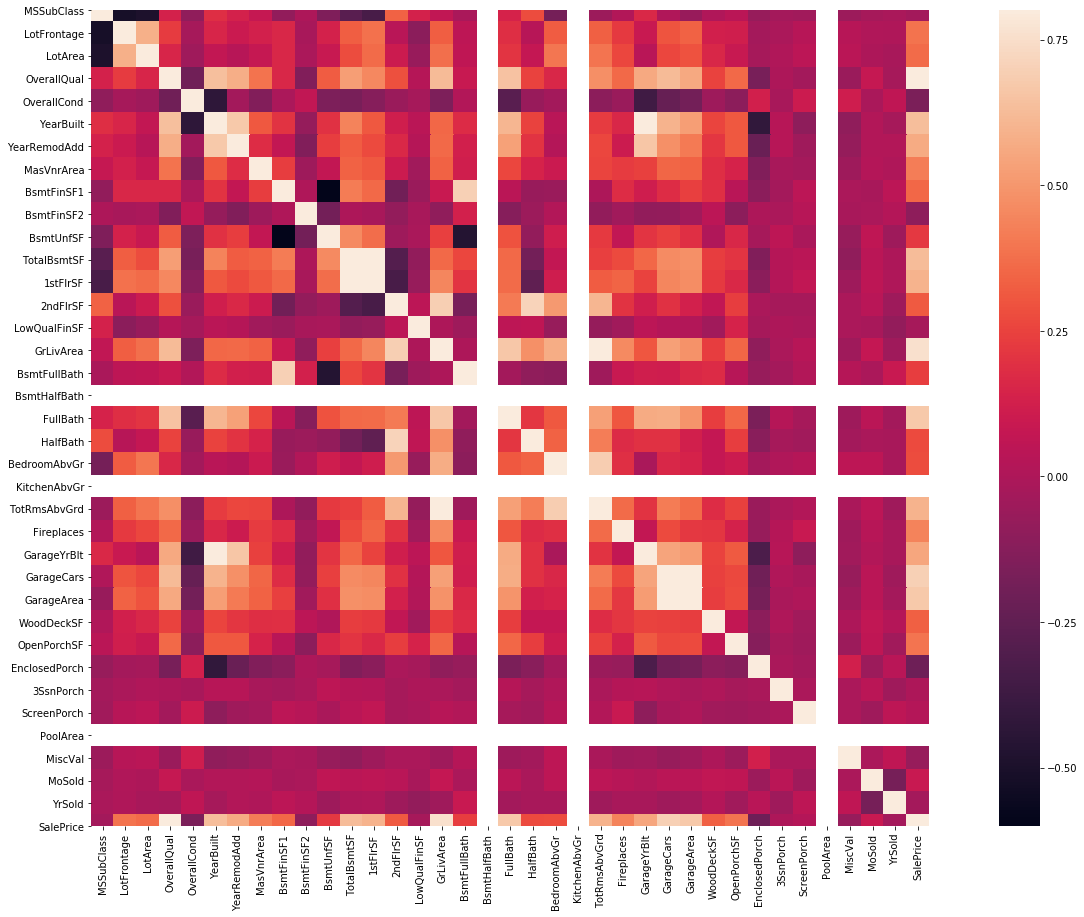

In [28]:
corrmat = numeric_train_df.corr()
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corrmat, vmax=.8, square=True);

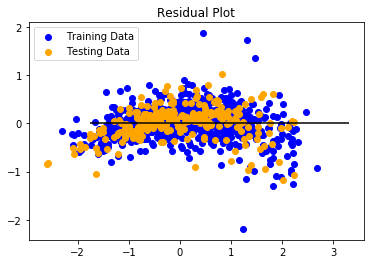

MSE: 0.11696622227312457, R2: 0.8774045792017136

0.8877020482813549
0.8774045792017136


In [29]:
from sklearn.model_selection import train_test_split
X = numeric_train_df.drop(["SalePrice"], axis =1)
y = numeric_train_df["SalePrice"]
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
print()

print(model.score(X_train_scaled,y_train_scaled))

print(model.score(X_test_scaled,y_test_scaled))

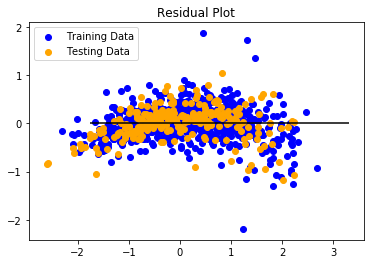

MSE: 0.11687295064534736, R2: 0.8775023396853272

0.8877056660197291
0.8775023396853272


In [30]:
numeric_train_df = numeric_train_df.drop(['KitchenAbvGr',"BsmtHalfBath","PoolArea"], axis =1)   

# numeric_train_df = numeric_train_df.drop(['TotRmsAbvGrd','GarageYrBlt'], axis =1)   

X = numeric_train_df.drop(["SalePrice"], axis =1)
y = numeric_train_df["SalePrice"]
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
print()

print(model.score(X_train_scaled,y_train_scaled))

print(model.score(X_test_scaled,y_test_scaled))

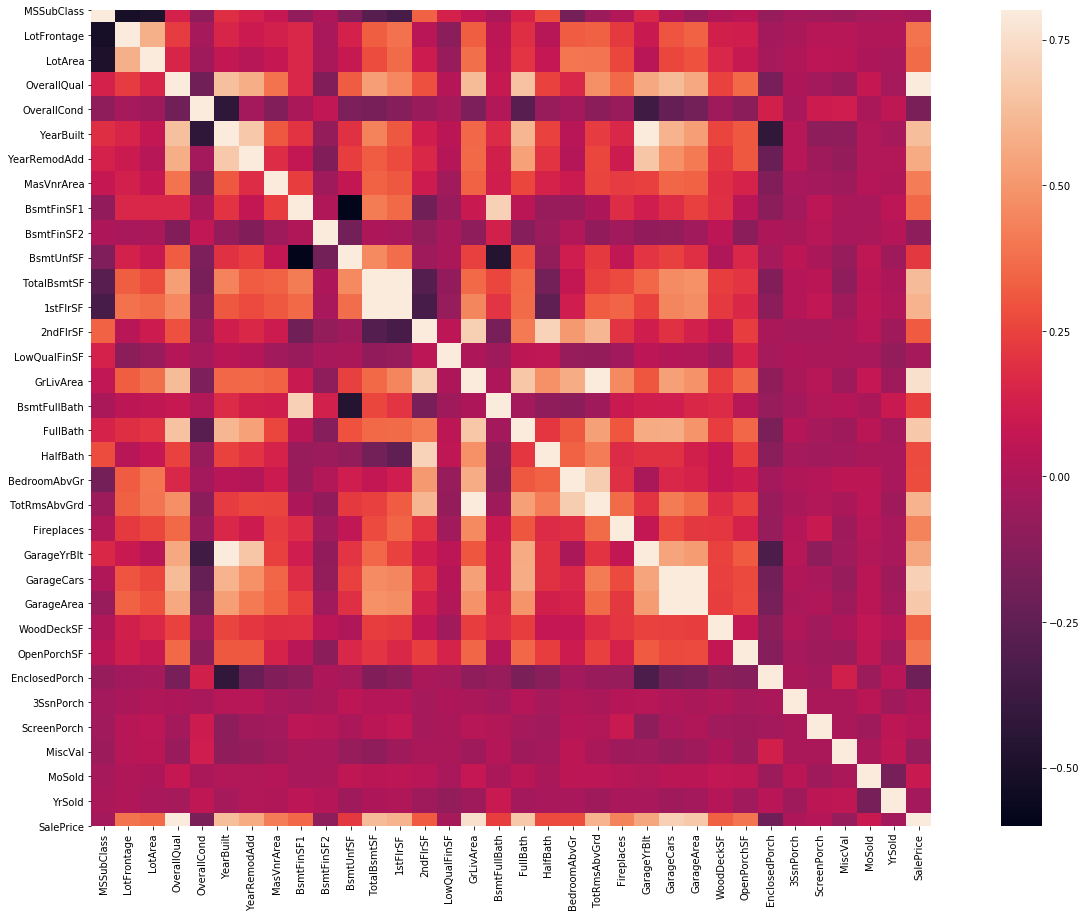

In [31]:
corrmat = numeric_train_df.corr()
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corrmat, vmax=.8, square=True);

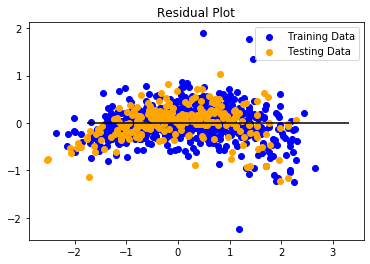

MSE: 0.11646629868881833, R2: 0.877928562459392

0.8865343179760662
0.877928562459392


In [32]:
numeric_train_df = numeric_train_df.drop(['YrSold','MoSold','ScreenPorch','3SsnPorch','BsmtUnfSF','LowQualFinSF'], axis =1)   

# numeric_train_df = numeric_train_df.drop(['TotRmsAbvGrd','GarageYrBlt'], axis =1)   

X = numeric_train_df.drop(["SalePrice"], axis =1)
y = numeric_train_df["SalePrice"]
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
print()

print(model.score(X_train_scaled,y_train_scaled))

print(model.score(X_test_scaled,y_test_scaled))

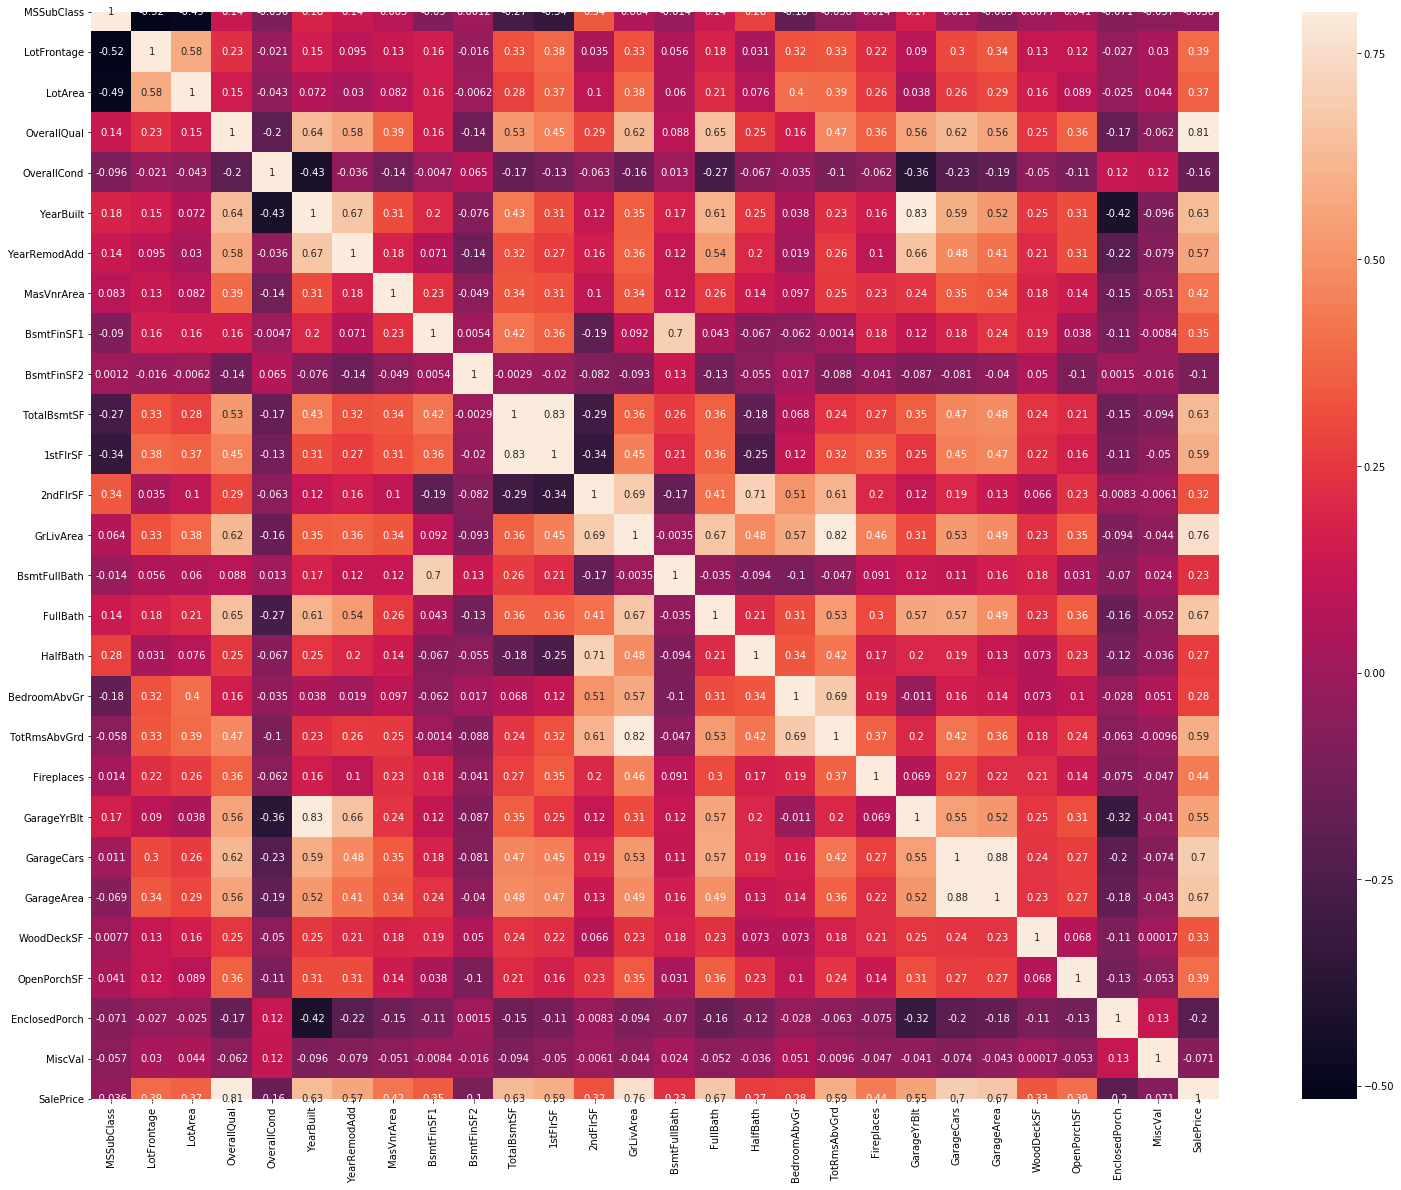

In [33]:
corrmat = numeric_train_df.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True);

In [34]:
numeric_train_df.corr()['SalePrice'].sort_values(ascending=False)[1:80]

OverallQual      0.814225
GrLivArea        0.757667
GarageCars       0.696680
GarageArea       0.670006
FullBath         0.669395
YearBuilt        0.631924
TotalBsmtSF      0.627028
TotRmsAbvGrd     0.593702
1stFlrSF         0.593001
YearRemodAdd     0.566254
GarageYrBlt      0.553317
Fireplaces       0.438188
MasVnrArea       0.418285
OpenPorchSF      0.394750
LotFrontage      0.389136
LotArea          0.365316
BsmtFinSF1       0.351813
WoodDeckSF       0.332944
2ndFlrSF         0.318319
BedroomAbvGr     0.275493
HalfBath         0.269575
BsmtFullBath     0.233553
MSSubClass      -0.036455
MiscVal         -0.070546
BsmtFinSF2      -0.100640
OverallCond     -0.160951
EnclosedPorch   -0.204649
Name: SalePrice, dtype: float64

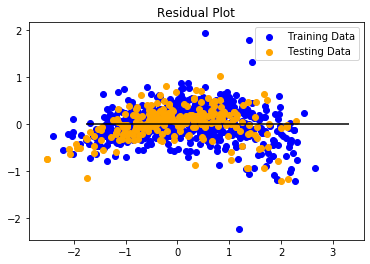

MSE: 0.11639390718527137, R2: 0.8780044379272585

0.8859920489502136
0.8780044379272585


In [35]:
numeric_train_df = numeric_train_df.drop(['BsmtFullBath'], axis =1)   


X = numeric_train_df.drop(["SalePrice"], axis =1)
y = numeric_train_df["SalePrice"]
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
print()

print(model.score(X_train_scaled,y_train_scaled))

print(model.score(X_test_scaled,y_test_scaled))

In [36]:
# numeric_train_df = numeric_train_df.drop(['GarageCars'], axis =1)   


# X = numeric_train_df.drop(["SalePrice"], axis =1)
# y = numeric_train_df["SalePrice"]
# y = pd.DataFrame(y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)


# model = LinearRegression()
# model.fit(X_train_scaled, y_train_scaled)
# plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
# plt.title("Residual Plot")
# plt.show()

# predictions = model.predict(X_test_scaled)
# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = model.score(X_test_scaled, y_test_scaled)

# print(f"MSE: {MSE}, R2: {r2}")
# print()

# print(model.score(X_train_scaled,y_train_scaled))

# print(model.score(X_test_scaled,y_test_scaled))